In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.base import clone

#### The Normal Equation

In [13]:
X = 2 * np.random.rand(100, 1)
theta_true = np.array([4, 3])

y = np.dot(np.c_[np.ones_like(X), X], theta_true) + np.random.rand(100)

Text(0,0.5,'y')

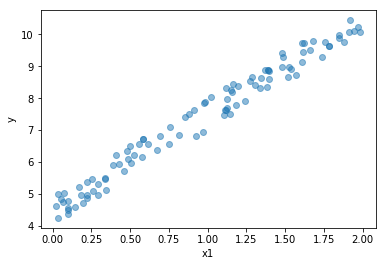

In [15]:
plt.plot(X, y, 'o', alpha=.5)
plt.xlabel('x1')
plt.ylabel('y')

In [17]:
X_b = np.c_[np.ones_like(X), X]   # add x0=1 in first columns

In [19]:
theta_best = np.linalg.inv(np.dot(X_b.T, X_b)).dot(np.dot(X_b.T, y))

In [20]:
theta_best

array([4.54410984, 2.97059987])

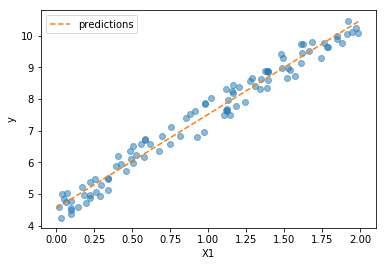

In [34]:
X_new = np.array([[1, 0], 
                  [1, 2]])
y_pred = np.dot(X_new, theta_best)

plt.plot(X, y, 'o', alpha=.5)
plt.plot(X_new[:, 1], y_pred, '--', label='predictions')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()

In [25]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lr.coef_, lr.intercept_

(array([2.97059987]), 4.544109842307926)

In [28]:
theta_best

array([4.54410984, 2.97059987])

In [35]:
lr_pred = lr.predict(X_new[:, 1].reshape(-1, 1))

In [36]:
y_pred, lr_pred

(array([ 4.54410984, 10.48530959]), array([ 4.54410984, 10.48530959]))

#### Gradient Descent

In [51]:
eta = .1
n_iterations = 1000
m = 100

theta = np.random.rand(2)
for _ in range(n_iterations):
    y_hat = np.dot(X_b, theta)
    error = y_hat - y
    d_theta = 2*np.dot(error, X_b)/m
    
    theta -= eta * d_theta

In [52]:
theta

array([4.54410984, 2.97059987])

#### Stochastic Gradient Descent

In [55]:
n_epochs = 50
t0, t1 = 5, 50

def leanring_rate(t):
    '''adaptive learning rate'''
    return t0/(t + t1)

theta_sgd = np.random.rand(2)
for n in range(n_epochs):
    for i, rand_i in enumerate(np.random.permutation(m)):
        X_i = X_b[rand_i:rand_i+1]
        y_i = y[rand_i:rand_i+1]
        y_hat_i = np.dot(X_i, theta_sgd)
        error_i = y_hat_i - y_i
        
        d_theta = 2*np.dot(error_i, X_i)
        theta_sgd -= leanring_rate(n*m + i)*d_theta

In [56]:
theta_sgd

array([4.54384596, 2.97128314])

In [68]:
sgd = SGDRegressor(eta0=.1, n_iter=50, penalty=None)
sgd.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [69]:
sgd.coef_, sgd.intercept_

(array([2.97327383]), array([4.54966265]))

#### Polynomial Regression

In [3]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

Text(0,0.5,'y')

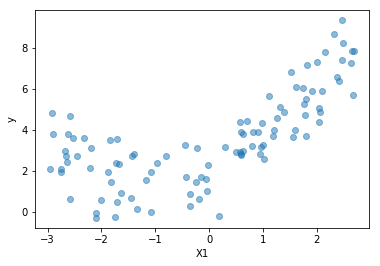

In [72]:
plt.plot(X, y, 'o', alpha=.5)
plt.xlabel('X1')
plt.ylabel('y')

In [5]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
X_new = np.arange(-3, 3, .1)[:, None]
pred_lr = lr.predict(X_new)

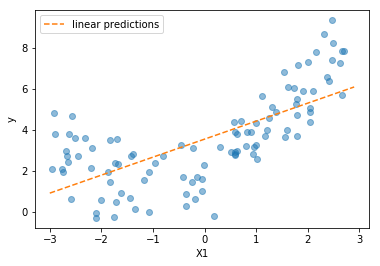

In [87]:
plt.plot(X, y, 'o', alpha=.5)
plt.plot(X_new, pred_lr, '--', label='linear predictions')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()

In [7]:
poly_d2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_d2.fit_transform(X)

In [83]:
lr_poly = LinearRegression().fit(X_poly, y)

In [88]:
y_poly_pred = lr_poly.predict(poly_d2.transform(X_new))

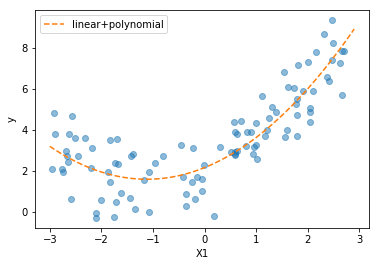

In [89]:
plt.plot(X, y, 'o', alpha=.5)
plt.plot(X_new, y_poly_pred, '--', label='linear+polynomial')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()

In [91]:
lr_poly.coef_, lr_poly.intercept_

(array([[1.0157131 , 0.45408101]]), array([2.15885792]))

In [8]:
def plot_learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    train_errors, val_erros = [], []
    xs = range(1, len(X_train), 2)
    for i in xs:
        clf = model.fit(X_train[:i], y_train[:i])
        train_errors.append(mean_squared_error(y_train[:i], clf.predict(X_train[:i])))
        val_erros.append(mean_squared_error(y_test, clf.predict(X_test)))
    
    plt.plot(xs, np.sqrt(train_errors), '--', label='train')
    plt.plot(xs, np.sqrt(val_erros), '-', label='val')
    plt.xlabel('sample size')
    plt.ylabel('rmse')
    plt.legend()

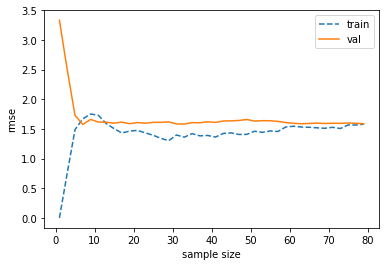

In [109]:
plot_learning_curve(LinearRegression(), X, y)

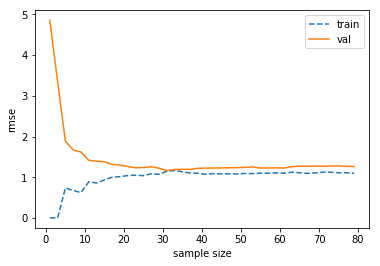

In [116]:
plot_learning_curve(LinearRegression(), X_poly, y)

(0, 5)

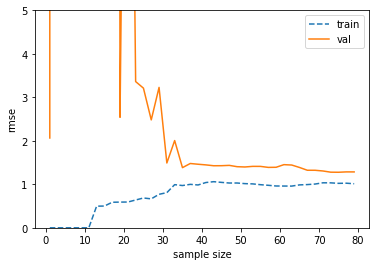

In [122]:
pipe_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=10, include_bias=False)),
    ('lr', LinearRegression())
])

plot_learning_curve(pipe_poly, X, y)
plt.ylim([0, 5])

#### Regularized Linear Models

#### Ridge Regression

In [9]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
ridge_reg.predict([[1.5]])

array([[5.17056847]])

In [13]:
sgd_reg = SGDRegressor(penalty='l2', max_iter=50)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [14]:
sgd_reg.predict([[1.5]])

array([5.15629881])

#### Lasso Regression

In [24]:
lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
lasso_reg.predict([[1.5]])

array([5.12805999])

#### Elastic Net

In [38]:
elastic_net = ElasticNet(alpha=.1, l1_ratio=.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
elastic_net.predict([[1.5]])

array([5.12958282])

#### Early Stopping

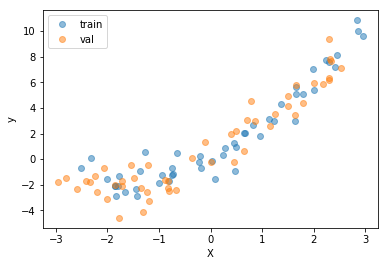

In [146]:
m = 100
X = np.random.rand(m, 1) * 6 - 3
y = (2*X + 0.5*X**2 + np.random.randn(m, 1)).ravel()

X_train, X_val, y_train, y_val = X[:50], X[50:], y[:50], y[50:]

plt.plot(X_train, y_train, 'o', alpha=.5, label='train')
plt.plot(X_val, y_val, 'o', alpha=.5, label='val')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

poly_std_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=90, include_bias=False)),
    ('scaler', StandardScaler())
])

X_train_poly = poly_std_pipe.fit_transform(X_train)
X_val_poly = poly_std_pipe.transform(X_val)

X_train_poly.shape, X_val_poly.shape

sgd_regressor = SGDRegressor(max_iter=1, warm_start=True, penalty=None, 
                             learning_rate='constant', eta0=.0005)

train_errors = []
val_errors = []

min_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(500):
    sgd_regressor.fit(X_train_poly, y_train)
    y_train_pred = sgd_regressor.predict(X_train_poly)
    y_val_pred = sgd_regressor.predict(X_val_poly)
    current_val_mse = mean_squared_error(y_val, y_val_pred)
    current_train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(current_train_mse)
    val_errors.append(current_val_mse)
    if current_val_mse < min_val_error:
        min_val_error = current_val_mse
        best_epoch = epoch
        best_model = clone(sgd_regressor)

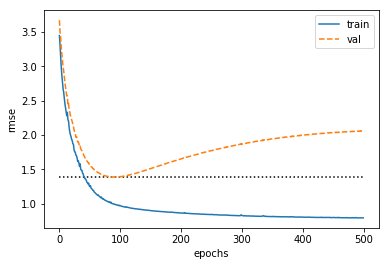

In [152]:
xs = range(500)
plt.plot(xs, np.sqrt(train_errors), '-', label='train')
plt.plot(xs, np.sqrt(val_errors), '--', label='val')
plt.xlabel('epochs')
plt.ylabel('rmse')
plt.legend()

min_rmse = np.sqrt(np.min(val_errors))
plt.hlines(min_rmse, 0, 500, linestyles=':')

#### Logistic Regression

In [157]:
-np.log10(1/3)

0.47712125471966244

In [158]:
from sklearn import datasets
iris = datasets.load_iris()

In [159]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [161]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [160]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [163]:
X = iris['data'][:, 3:]     # petal width feature
y = (iris['target'] == 2).astype(int)    # [is virginica]

X.shape, y.shape

((150, 1), (150,))

In [164]:
X.min(), X.max()

(0.1, 2.5)

In [166]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [174]:
X_new = np.linspace(0, 3, 1000)[:, None]
y_prob = log_reg.predict_proba(X_new)

Text(0,0.5,'probability')

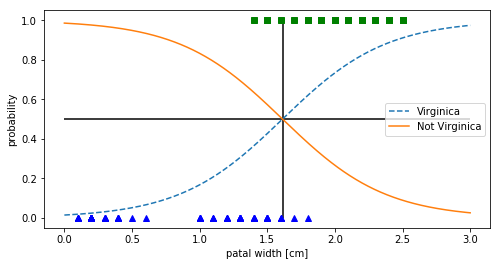

In [186]:
plt.figure(figsize=(8, 4))
plt.plot(X_new, y_prob[:, 1], '--', label='Virginica')
plt.plot(X_new, y_prob[:, 0], '-', label='Not Virginica')
plt.legend(loc='best')
plt.hlines(0.5, 0, 3)

i_decision = np.argmin(np.abs((y_prob[:, 1] - 0.5)))
plt.vlines(X_new[i_decision], 0, 1)

plt.plot(X[y==1], y[y==1], 'gs')
plt.plot(X[y==0], y[y==0], 'b^')
plt.xlabel('patal width [cm]')
plt.ylabel('probability')

In [187]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [188]:
X = iris.data[:, 2:]

In [201]:
d1_min, d1_max, d2_min, d2_max

(0.9, 7.0, 0.0, 2.6)

(0.8, 2.6)

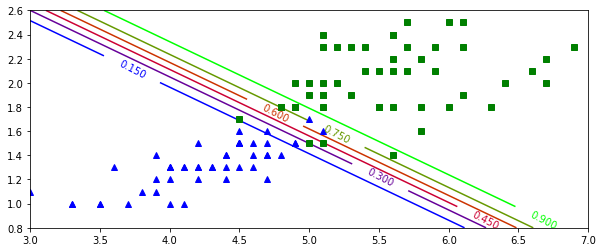

In [207]:
model = LogisticRegression(C=1e6).fit(X, y)
d1_min, d1_max = 3, 7
d2_min, d2_max = .8, 2.6

d1_space = np.linspace(d1_min, d1_max, num=500)
d2_space = np.linspace(d2_min, d2_max, num=200)

D1, D2 = np.meshgrid(d1_space, d2_space)

Z = model.predict_proba(np.c_[D1.ravel(), D2.ravel()])[:, 1].reshape(D1.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'b^')
plt.plot(X[y==1, 0], X[y==1, 1], 'gs')
contour = plt.contour(D1, D2, Z, cmap=plt.cm.brg)
plt.clabel(contour)
plt.xlim(d1_min, d1_max)
plt.ylim(d2_min, d2_max)

#### Softmax Regression

In [209]:
X = iris.data[:, 2:]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

In [ ]:
softmax_reg = LogisticRegression(solver='lbfgs', C=10, multi_class='multinomial')

softmax_reg.fit(X, y)


x0_min, x0_max = X[:, 0].min()*.9, X[:, 0].max()*1.1
x1_min, x1_max = X[:, 1].min()*.9, X[:, 1].max()*1.1

x0_space = np.linspace(x0_min, x0_max, 500)
x1_space = np.linspace(x1_min, x1_max, 300)

X0, X1 = np.meshgrid(x0_space, x1_space)
Z_prob = softmax_reg.predict_proba(np.c_[X0.ravel(), X1.ravel()])[:, 1].reshape(X0.shape)
Z_label = softmax_reg.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape)

plt.figure(figsize=(10, 4))
for label, marker, name in zip(np.unique(y), 'ro gx bs'.split(), iris.target_names):
    plt.plot(X[y==label, 0], X[y==label, 1], marker, label=name)
    
plt.legend()
plt.contourf(X0, X1, Z_label, cmap=plt.cm.RdYlBu, alpha=.5)
contour = plt.contour(X0, X1, Z_prob)
plt.clabel(contour)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

In [232]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Problem 12.
* Implement Batch Gradient Descent with early stoppong for Softmax Regression

##### Softmax function
$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

#### Cross Entropy Cost function
$J(\Theta) = -\dfrac{1}{m}\sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$


#### Gradient Vector
$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

In [4]:
# load library
import numpy as np
import pandas as pd
from sklearn import datasets

# load data
iris = datasets.load_iris()

In [5]:
# prepare data

X = iris.data[:, 2:]
y = iris.target

In [6]:
X.shape, y.shape

((150, 2), (150,))

In [7]:
# add bias column to X
X = np.c_[np.ones(len(X)), X]
X.shape

(150, 3)

In [10]:
total_size = len(X)
test_size = .2
val_size = .2

n_test = int(total_size*test_size)
n_val = int(total_size*val_size)
n_train = total_size - n_test - n_val


np.random.seed(2042)
rand_idx = np.random.permutation(total_size)
X, y = X[rand_idx], y[rand_idx]

X_train, y_train = X[:n_train], y[:n_train]
X_val, y_val = X[n_train:n_train+n_val], y[n_train:n_train+n_val]
X_test, y_test = X[n_train+n_val:], y[n_train+n_val:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((90, 3), (90,), (30, 3), (30,), (30, 3), (30,))

In [16]:
pd.DataFrame([pd.value_counts(y_train), 
              pd.value_counts(y_val), 
              pd.value_counts(y_test)], index=['train', 'val', 'test']).T

,train,val,test
0,31,9,10
1,29,11,10
2,30,10,10


In [17]:
def to_one_hot(y):
    n_class = y.max()+1
    y_onehot = np.zeros((len(y), n_class))
    y_onehot[range(len(y)), y] = 1
    return y_onehot

In [21]:
to_one_hot(y_train)[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [22]:
y_train[:5]

array([0, 1, 2, 1, 1])

In [23]:
y_train_onehot = to_one_hot(y_train)
y_val_onehot = to_one_hot(y_val)
y_test_onehot = to_one_hot(y_test)

y_train_onehot.shape, y_val_onehot.shape, y_test_onehot.shape

((90, 3), (30, 3), (30, 3))

In [26]:
def softmax(logits):
    exps = np.exp(logits)
    sum_exps = exps.sum(axis=1, keepdims=True)
    return exps / sum_exps

In [29]:
softmax(np.random.rand(4, 3))

array([[0.23484058, 0.26054705, 0.50461238],
       [0.37623141, 0.27972236, 0.34404623],
       [0.24866501, 0.33451877, 0.41681622],
       [0.30039804, 0.3806741 , 0.31892786]])

In [31]:
n_features = X_train.shape[1]
n_class = len(np.unique(y_train))
m = len(X_train)
n_features, n_class, m

(3, 3, 90)

In [34]:
# Gradient descent with softmax

eta = .1
n_iters = 5001
epsilon = 1e-7

Theta = np.random.randn(n_features, n_class)
for i in range(n_iters):
    
    logits = np.dot(X_train, Theta)
    y_probs = softmax(logits)
    cost = -(y_train_onehot * np.log(y_probs + epsilon)).sum(axis=1).mean()
    errors = y_probs - y_train_onehot
    d_theta = np.dot(X_train.T, errors) / m
    
    Theta -= eta*d_theta
    if (i+1)%500 == 0:
        print('iter: {}, cost: {:.4f}'.format(i+1, cost))

iter: 500, cost: 0.3973
iter: 1000, cost: 0.3050
iter: 1500, cost: 0.2599
iter: 2000, cost: 0.2311
iter: 2500, cost: 0.2105
iter: 3000, cost: 0.1949
iter: 3500, cost: 0.1825
iter: 4000, cost: 0.1724
iter: 4500, cost: 0.1640
iter: 5000, cost: 0.1569


In [40]:
Theta

array([[ 9.12361186,  1.89668981, -9.10871028],
       [-1.02681869,  1.0570057 ,  1.63237383],
       [-3.09658701, -0.93802336,  4.04210016]])

In [38]:
# train accuracy
y_pred = np.argmax(np.dot(X_train, Theta), axis=1)
(y_pred == y_train).mean()

0.9666666666666667

In [39]:
# val accuracy
y_pred = np.argmax(np.dot(X_val, Theta), axis=1)
(y_pred == y_val).mean()

0.9666666666666667

In [106]:
# Batch Gradient Descent with L2-regularization
eta = .1          # learning rate
n_iters = 10001
epsilon = 1e-7
alpha = .01         # l2 parameter

Theta = np.random.randn(n_features, n_class)
for i in range(n_iters):
    logits = np.dot(X_train, Theta)
    y_probs = softmax(logits)
    entropy_cost = -(y_train_onehot*np.log(y_probs + epsilon)).sum(axis=1).mean()
    l2_cost = 0.5 * (Theta[:, 1:]**2).sum()
    total_cost = entropy_cost + alpha*l2_cost
    
    errors = y_probs - y_train_onehot
    d_theta = np.dot(X_train.T, errors) / m + np.c_[np.zeros(len(Theta)), alpha*Theta[:, 1:]]
    Theta -= eta*d_theta
    
    if (i+1) % 500 == 0:
        print("iter: {}, cost: {:.4f}".format(i+1, total_cost))
    

iter: 500, cost: 0.4476
iter: 1000, cost: 0.3963
iter: 1500, cost: 0.3742
iter: 2000, cost: 0.3611
iter: 2500, cost: 0.3523
iter: 3000, cost: 0.3461
iter: 3500, cost: 0.3416
iter: 4000, cost: 0.3381
iter: 4500, cost: 0.3355
iter: 5000, cost: 0.3333
iter: 5500, cost: 0.3316
iter: 6000, cost: 0.3302
iter: 6500, cost: 0.3291
iter: 7000, cost: 0.3281
iter: 7500, cost: 0.3272
iter: 8000, cost: 0.3265
iter: 8500, cost: 0.3259
iter: 9000, cost: 0.3253
iter: 9500, cost: 0.3248
iter: 10000, cost: 0.3244


In [86]:
Theta

array([[10.64829802,  1.95846704, -2.26383416],
       [-2.29731089,  0.01935585,  0.0595123 ],
       [-4.25009554, -1.19715112,  1.30247416]])

In [87]:
# train accuracy
y_pred = np.argmax(np.dot(X_train, Theta), axis=1)
(y_train==y_pred).mean()

0.9666666666666667

In [88]:
# val accuracy
y_pred = np.argmax(np.dot(X_val, Theta), axis=1)
(y_pred==y_val).mean()

0.9666666666666667

In [108]:
# Batch Gradient Descent with L2-regularizer and Early-stop
eta = .1
n_iters = 5001
alpha = .001
epsilon = 1e-7
best_cost = np.infty


Theta = np.random.randn(n_features, n_class)
for i in range(n_iters):
    logits = np.dot(X_train, Theta)
    y_probs = softmax(logits)
    
    # compute J(theta)
    entropy_cost = -np.sum(y_train_onehot * np.log(y_probs + epsilon), axis=1).mean()
    l2_cost = 0.5 * (Theta[:, 1:]**2).sum()
    total_cost = entropy_cost + alpha*l2_cost
    
    # compute dJ(theta)
    errors = y_probs - y_train_onehot
    d_theta = np.dot(X_train.T, errors)/m + np.c_[np.zeros(len(Theta)), alpha*Theta[:, 1:]]
    Theta -= eta*d_theta
    
    if (i+1)%500==0:
        print('iter: {}, cost: {:.4f}'.format(i+1, total_cost))
    
    if total_cost < best_cost:
        best_cost = total_cost
    else:
        print('iter: {}, cost: {:.4f}, Early stop!!!'.format(i+1, total_cost))
        break

iter: 500, cost: 0.4036
iter: 1000, cost: 0.3250
iter: 1500, cost: 0.2876
iter: 2000, cost: 0.2650
iter: 2500, cost: 0.2498
iter: 3000, cost: 0.2389
iter: 3500, cost: 0.2308
iter: 4000, cost: 0.2246
iter: 4500, cost: 0.2197
iter: 5000, cost: 0.2157


In [109]:
# train accuracy
y_pred = np.argmax(np.dot(X_train, Theta), axis=1)
(y_pred==y_train).mean()

0.9666666666666667

In [110]:
# val accuracy
y_pred = np.argmax(np.dot(X_val, Theta), axis=1)
(y_pred==y_val).mean()

0.9666666666666667

In [111]:
# test accuracy
y_pred = np.argmax(np.dot(X_test, Theta), axis=1)
(y_pred == y_test).mean()

0.9666666666666667

Text(0,0.5,'petal width (cm)')

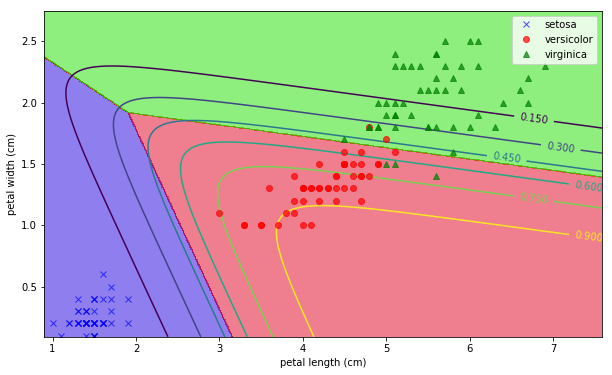

In [114]:
x0_min, x0_max = X[:, 1].min()*.9, X[:, 1].max()*1.1
x1_min, x1_max = X[:, 2].min()*.9, X[:, 2].max()*1.1

X0, X1 = np.meshgrid(np.linspace(x0_min, x0_max, 500), 
                     np.linspace(x1_min, x1_max, 500))

Y_probs = softmax(np.dot(np.c_[np.ones(len(X0.ravel())), X0.ravel(), X1.ravel()], Theta))
Z_preds = np.argmax(Y_probs, axis=1).reshape(X0.shape)
Z_probs = Y_probs[:, 1].reshape(X0.shape)

plt.figure(figsize=(10, 6))
for l, s in zip(np.unique(y), 'bx ro g^'.split()):
    plt.plot(X[y==l, 1], X[y==l, 2], s, label=iris.target_names[l], alpha=.7)
    
plt.legend()
plt.contourf(X0, X1, Z_preds, cmap=plt.cm.brg, alpha=.5)
contour = plt.contour(X0, X1, Z_probs)
plt.clabel(contour)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

In [103]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')